## Hw 21.3

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp

# set up the right hand side of the ODE, with the parameter
# tf (the final time rescaled)
def chemo_finite_time(t,y,p):
    alpha = 1
    tf=p[0]
    return np.vstack((tf*alpha*y[0] + tf*0.5*y[1], -tf*alpha*y[1]))

# set up the endpoint conditions. The final one is H(tf) = 2a( -tf-1)
def bc_new(ya,yb,p):
    x0 = 2
    a=1
    alpha = 1
    m=2
    tf = p[0]
    return np.array([ya[0]-x0, yb[1]+m, alpha*yb[0]*yb[1]+.25*yb[1]**2-2*a*(tf-1)])

# construct the solution using solve_bvp. We use an initial -guess
# of tf=1 as that is the value we are forcing the solution to be -close to.
t=np.linspace(0,1,10)
y = np.zeros((2, t.size))
res = solve_bvp(chemo_finite_time, bc_new, t, y, p=[1])

# plot the results and print out the optimal final time t_f
t_plot = np.linspace(0, 1, 100)
x_plot = res.sol(t_plot)[0]
p_plot = res.sol(t_plot)[1]
plt.plot(t_plot, x_plot)
plt.plot(t_plot, -.5*p_plot)
plt.legend(['cancer cells','chemo concentration'])
print('t_f = '+str(res.p[0]))

In [ ]:
#21.1
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp
#First define the right hand side of the differential equation.
#Note that we are avoiding parameters in the function itself.
def chemo3(t,y):
    alpha = 1
    return np.vstack((alpha*y[0] + 0.5*y[1], -alpha*y[1]))

#Now define a function that treats the boundary conditions.
def bc(ya,yb):
    x0 = 2
    m=3
    return np.array([ya[0]-x0, yb[1]+m])

#Now compute the solution. We may need more than 10 points...
t=np.linspace(0,1,10)
y = np.zeros((2, t.size)) #specify an 'initial guess' for the -soln y
res = solve_bvp(chemo3, bc, t, y)

#Plotting the results (if desired)
t_plot = np.linspace(0, 1, 100)
x_plot = res.sol(t_plot)[0]
p_plot = res.sol(t_plot)[1]
plt.plot(t_plot, x_plot) # the state
plt.plot(t_plot, -.5*p_plot) #the control
plt.legend(['cancer cells','chemo concentration'])

21.8

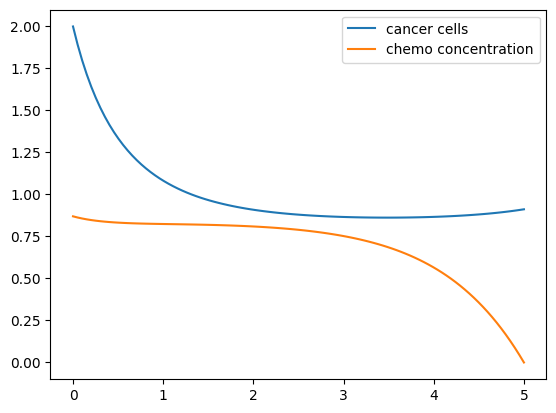

In [5]:

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp
r = 1
N0 = 2
delta = .5
tf = 5
#First define the right hand side of the differential equation.
#Note that we are avoiding parameters in the function itself.
def chemo3(t,y):
    alpha = 1
    return np.vstack((r*y[0]*np.log(1/y[0]) - delta*y[0]*(-y[1]*y[0]*delta)/2, -(y[1]*r*np.log(1/y[0]) -y[1]*r - y[1]*delta*(-y[1]*y[0]*delta/2) -2*y[0])))

#Now define a function that treats the boundary conditions.
def bc(ya,yb):
    x0 = N0
    m=0
    return np.array([ya[0]-x0, yb[1]+m])

#Now compute the solution. We may need more than 10 points...
t=np.linspace(0,5,10)
y = np.ones((2, t.size)) #specify an 'initial guess' for the -soln y
res = solve_bvp(chemo3, bc, t, y)

#Plotting the results (if desired)
t_plot = np.linspace(0, 5, 100)
x_plot = res.sol(t_plot)[0]
p_plot = res.sol(t_plot)[1]
plt.plot(t_plot, x_plot) # the state
plt.plot(t_plot, -.5*p_plot) #the control
plt.legend(['cancer cells','chemo concentration'])

t_f = 9.91164910126685


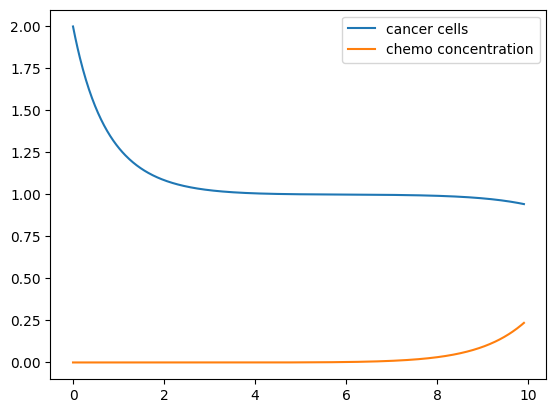

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp

# set up the right hand side of the ODE, with the parameter
# tf (the final time rescaled)
def chemo_finite_time(t,y,p):
    alpha = 1
    tf=p[0]
    return tf*np.vstack((r*y[0]*np.log(1/y[0]) + delta*y[0]*(y[1]*y[0]*delta)/2, -y[1]*r*np.log(1/y[0]) + y[1]*r + y[1]*delta*(-y[1]*y[0]*delta/2)))

# set up the endpoint conditions. The final one is H(tf) = 2a( -tf-1)
def bc_new(ya,yb,p):
    x0 = 2
    a=1
    alpha = 1
    delta = .5
    m=1
    Nf = yb[0]
    pf = yb[1]
    tf = p[0]
    u = -delta*yb[0]*yb[1]/2
    return np.array([ya[0]-x0, yb[1]+m, pf*r*Nf*np.log(1/Nf) - pf*delta*u*Nf -u**2])

# construct the solution using solve_bvp. We use an initial -guess
# of tf=1 as that is the value we are forcing the solution to be -close to.
t=np.linspace(0,1,100)
y = np.ones((2, t.size))*2
res = solve_bvp(chemo_finite_time, bc_new, t, y, p=[5])

# plot the results and print out the optimal final time t_f
t_plot = res.x*res.p[0]
x_plot = res.y[0]
p_plot = res.y[1]
plt.plot(t_plot, x_plot)
plt.plot(t_plot, -delta*x_plot*p_plot/2)
plt.legend(['cancer cells','chemo concentration'])
print('t_f = '+str(res.p[0]))

t_f = 1.1348221869919262


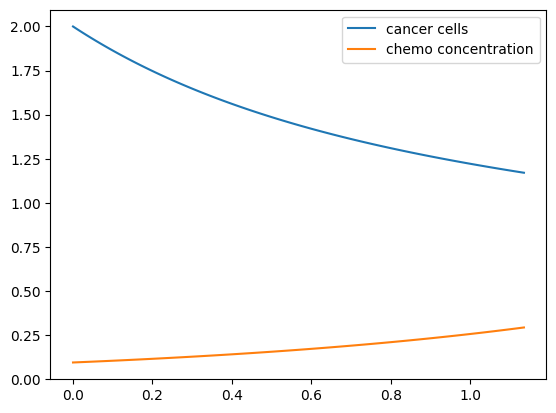

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp

# set up the right hand side of the ODE, with the parameter
# tf (the final time rescaled)
def chemo_finite_time(t,y,p):
    alpha = 1
    tf=p[0]
    return tf*np.vstack((r*y[0]*np.log(1/y[0]) + delta*y[0]*(y[1]*y[0]*delta)/2, -y[1]*r*np.log(1/y[0]) + y[1]*r + y[1]*delta*(-y[1]*y[0]*delta/2)))

# set up the endpoint conditions. The final one is H(tf) = 2a( -tf-1)
def bc_new(ya,yb,p):
    x0 = 2
    a=1
    alpha = 1
    delta = .5
    m=1
    Nf = yb[0]
    pf = yb[1]
    tf = p[0]
    u = -delta*yb[0]*yb[1]/2
    return np.array([ya[0]-x0, yb[1]+m, pf*r*Nf*np.log(1/Nf) - pf*delta*u*Nf -u**2 - 2*a*(tf-1)])

# construct the solution using solve_bvp. We use an initial -guess
# of tf=1 as that is the value we are forcing the solution to be -close to.
t=np.linspace(0,1,100)
y = np.ones((2, t.size))*2
res = solve_bvp(chemo_finite_time, bc_new, t, y, p=[5])

# plot the results and print out the optimal final time t_f
t_plot = res.x*res.p[0]
x_plot = res.y[0]
p_plot = res.y[1]
plt.plot(t_plot, x_plot)
plt.plot(t_plot, -delta*x_plot*p_plot/2)
plt.legend(['cancer cells','chemo concentration'])
print('t_f = '+str(res.p[0]))